In [1]:
import os
import sys
import glob
import yaml
import pickle
import random

import numpy as np
import pandas as pd
import scipy.stats as stats
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, LabelEncoder

import json
from PIL import Image
from tqdm.notebook import tqdm
import wandb
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.utilities.seed import seed_everything

## config

In [2]:
EXP_NAME = str(Path().resolve()).split('/')[-1]

In [3]:
EXP_NAME

'exp124'

## subの用意

In [5]:
sub1 = pd.read_csv('../exp114/exp114_sub.csv')  # best
sub2 = pd.read_csv('../exp119/exp119_sub.csv')  # kalman
sub3 = pd.read_csv('../../input/ensemble/sub56.csv')  # 2kaido
sub = sub1.copy()

In [6]:
sub['x'] = sub1['x'].values*0.5 + sub2['x'].values*0.4 + sub3['x'].values*0.1
sub['y'] = sub1['y'].values*0.5 + sub2['y'].values*0.4 + sub3['y'].values*0.1

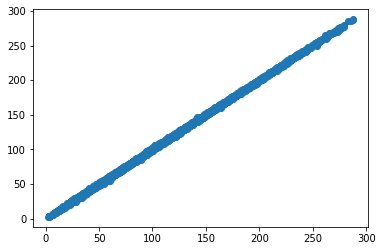

In [7]:
plt.scatter(sub['x'], sub1['x'])

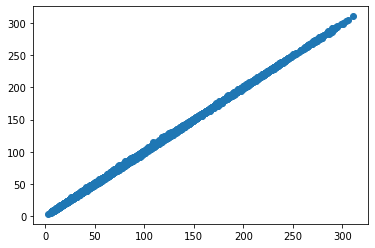

In [8]:
plt.scatter(sub['y'], sub1['y'])

In [9]:
sub.to_csv(EXP_NAME + '_ensemble_sub.csv', index=False)